Detalle de la tarea: Realizar un python  - jupyter en el cual: 

* ~**seleccione cuales sus datos a analizar**~
* ~**indique el origen de es datos, link, descripción**~
* ~**describa el contenido de las columnas**~
* ~**debe establecer la lectura de los datos y carga en un dataframe (utilice pandas)**~
* **debe realizar como mínimo 4 gráficos y estos deben tener la siguiente configuración**
    * **texto con pregunta, explicación del gráfico, la importancia del análisis y los datos involucrados**
    * **instrucciones python para la creación de gráficos estadísticos, sugerencia utilizar pandas y matplotlib**
    * **imagen del gráfico**
* **debe por lo menos tener un gráfico de torta, uno de barra y uno de curvas (pueden incluir más de una categoria, ejemplo: sexo masculino, femenino, otro)**
* **si cree necesario generar más gráficos para explicar su análisis, puede hacerlo**

Nota: el ayudante es Matias Martínez, a quien copio en este email.


===============================================================================================

Se analizaran datos meteorologicos del pais recolectados del año 2023. Los datos seran extraidos del sitio Dirección Meteorológica de Chile - Servicios Climáticos de la Dirección General De Aeronáutica Civil. El sitio contempla una amplia cantidad de datos meteorologicos de diferentes ambitos, recolectados de varias estaciones posicionadas a lo largo del pais.

Link al sitio: https://climatologia.meteochile.gob.cl/

Los datos descargados del sitio vienen en planillas excel separadas con diferentes formatos. Por ello, se ha decidido preprocesar los datos descargados para consolidarlos en archivos que contemplen los datos de una estacion particular, que contemple las columnas relevantes para el analisis. Para efectos de simplicidad, se han elegido 5 estaciones localizadas a lo largo del pais(Zona norte, centro y sur)

A continuacion se describen las columnas del archivo resultante:
- Fecha y hora del registro
- La estación meteorologica de la cual se extrajo el dato, denotada por el identificador de dicha estacion
- Radiacion Global Instantanea, medida en watt/m2
- Temperatura, medida en celsius
- Agua caida en un periodo de 6 horas, medida en mm
- Velocidad del viento, medida en nudos(kt)
- Nivel de humedad relativa del aire, denotada por un porcentaje.

===============================================================================================

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

#Lectura de identificadores
#Como los archivos descargados siguen un formato que involucra el identificador, es util tener a mano estos datos para agrupar los datos

f = open("Datos/ID_Estaciones.txt", "r")
ids = []
lines = f.readlines()

for line in lines:
    ids.append(line.split(",")[2].split("\n")[0])

print(ids)

['510005', '400009', '180005', '330020', '550001']


In [5]:
#Agrupacion de datos.
#
#Se agrupa los diferentes archivos de datos descargados en uno solo, con el proposito de facilitar la lectura y el acceso de los datos para el futuro.

for id in ids:
    
    df = pd.read_csv("Datos/"+ id +"/"+ id +"_2023_Agua6Horas_.csv", delimiter=";")
    df2 = pd.read_csv("Datos/"+ id +"/"+ id +"_2023_Humedad_.csv", delimiter=";")
    df3 = pd.read_csv("Datos/"+ id +"/"+ id +"_2023_Temperatura_.csv", delimiter=";")
    df4 = pd.read_csv("Datos/"+ id +"/"+ id +"_2023_Viento_.csv", delimiter=";")
    
    meses = ["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dic"]
    
    df5 = pd.DataFrame(columns=['momento', 'RadGInst (watt/m2)'])
    
    for x in meses:
        tempDf = pd.DataFrame(columns=['momento', 'RadGInst (watt/m2)'])
        fragDf = pd.read_html("Datos/"+ id +"/Radiacion/"+x+".xls")[0]
        tempDf['momento'] = fragDf['Fecha'].astype(str) + " " + fragDf['Hora (UTC)'] +":00"
        tempDf['RadGInst (watt/m2)'] = fragDf['RadGInst (watt/m2)']
        if(df5.size == 0):
            df5 = pd.concat([tempDf], ignore_index = True)
        else:
            df5 = pd.concat([df5,tempDf], ignore_index = True)
    
    df5["index"] = id
        
    dfArr = [df,df2,df3,df4,df5]
    
    maxDf = dfArr[0]
    
    for x in dfArr:
        if(x.iloc[:,0].size > maxDf.iloc[:,0].size):
            maxDf = x
            
    if(maxDf.columns.values[0] != "momento"):
        cleanDf = maxDf.reset_index().iloc[:,:2]
        cleanDf.columns.values[1] = "momento"
    else:
        cleanDf = maxDf.iloc[:,[0,2]]
        
    newFrame = ["HR_Valor", "RRR6_Valor", "ff_Valor", "T_Valor", "RadGInst(watt/m2)"]
    
    col = df.reset_index().iloc[:,1:3]
    col1 = df2.reset_index().iloc[:,1:]
    col2 = df3.reset_index().iloc[:,1:]
    col3 = df4.reset_index().iloc[:,[1,3]]
    col4 = df5.iloc[:,:2]
    
    col.rename(columns = {'level_1':'momento'}, inplace = True) 
    col1.rename(columns = {'CodigoNacional':'momento'}, inplace = True) 
    col2.rename(columns = {'CodigoNacional':'momento'}, inplace = True) 
    col3.rename(columns = {'level_1':'momento'}, inplace = True) 
        
    df_merged = cleanDf.merge(col, on = 'momento', how = 'left')
    df_merged = df_merged.merge(col1, on = 'momento', how = 'left')
    df_merged = df_merged.merge(col2, on = 'momento', how = 'left')
    df_merged = df_merged.merge(col3, on = 'momento', how = 'left')
    
    df_merged = df_merged.merge(col4, on = 'momento', how = 'left')

    df_merged.columns.values[0] = "ID_Estacion"
    df_merged.columns.values[2] = "RR6_Valor"
    df_merged.columns.values[3] = "HR_Valor"
    df_merged.columns.values[4] = "Ts_Valor"
    df_merged.columns.values[5] = "ff_Valor"
    
    df_merged.to_excel(id+"_agrupado.xlsx")
    print('DataFrame de id: '+id+' generado con exito')

DataFrame de id: 510005 generado con exito
DataFrame de id: 400009 generado con exito
DataFrame de id: 180005 generado con exito
DataFrame de id: 330020 generado con exito
DataFrame de id: 550001 generado con exito


In [6]:
bigDf = pd.DataFrame()
for id in ids:
    df = pd.read_excel(id+"_agrupado.xlsx", sheet_name="Sheet1")
    if(bigDf.size == 0):
        bigDf = pd.concat([df.iloc[:,1:]], ignore_index = True)
    else:
        bigDf = pd.concat([bigDf,df.iloc[:,1:]], ignore_index = True)

bigDf

,ID_Estacion,momento,RR6_Valor,HR_Valor,Ts_Valor,ff_Valor,RadGInst (watt/m2)
0,510005,01-01-2023 00:00:00,0.0,57.8,9.7,23.0,78.1
1,510005,01-01-2023 01:00:00,NaN,61.6,8.8,22.0,7.7
2,510005,01-01-2023 02:00:00,NaN,62.0,8.1,20.0,0.0
3,510005,01-01-2023 03:00:00,NaN,59.6,8.7,20.0,0.0
4,510005,01-01-2023 04:00:00,NaN,58.8,8.9,17.0,0.0
...,...,...,...,...,...,...,...
43241,550001,31-12-2023 19:00:00,NaN,31.0,13.7,12.0,628.8
43242,550001,31-12-2023 20:00:00,NaN,30.0,14.0,16.0,833.5
43243,550001,31-12-2023 21:00:00,NaN,30.0,14.0,14.0,655.5
43244,550001,31-12-2023 22:00:00,NaN,35.9,13.4,10.0,490.6


In [41]:
filtered_df = bigDf[bigDf['momento'].str.contains('-11-')]
filtered_df

,ID_Estacion,momento,RR6_Valor,HR_Valor,Ts_Valor,ff_Valor,RadGInst (watt/m2)
7329,510005,01-11-2023 00:00:00,0.0,69.7,5.0,6.0,0.4
7330,510005,01-11-2023 01:00:00,NaN,70.8,4.7,3.0,0.0
7331,510005,01-11-2023 02:00:00,NaN,76.0,3.3,3.0,0.0
7332,510005,01-11-2023 03:00:00,NaN,74.4,3.7,5.0,0.0
7333,510005,01-11-2023 04:00:00,NaN,80.9,2.4,2.0,0.0
...,...,...,...,...,...,...,...
42504,550001,30-11-2023 19:00:00,NaN,50.0,9.5,20.0,852.2
42505,550001,30-11-2023 20:00:00,NaN,55.0,8.7,23.0,790.7
42506,550001,30-11-2023 21:00:00,NaN,50.0,9.0,15.0,701.5
42507,550001,30-11-2023 22:00:00,NaN,60.9,8.2,17.0,298.4


32.65200708382527
39.7036158861885
24.125714285714285
39.735099206349204
2040986.9000000001


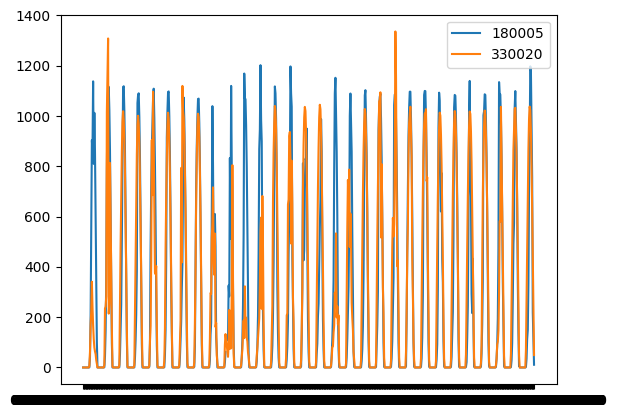

In [43]:
est1 = filtered_df.query('ID_Estacion == 510005')
est2 = filtered_df.query('ID_Estacion == 180005')
est3 = filtered_df.query('ID_Estacion == 400009')
est4 = filtered_df.query('ID_Estacion == 330020')

print(est1["RadGInst (watt/m2)"].sum()/est1.size)
print(est2["RadGInst (watt/m2)"].sum()/est2.size)
print(est3["RadGInst (watt/m2)"].sum()/est3.size)
print(est4["RadGInst (watt/m2)"].sum()/est4.size)

#plt.plot(est1["momento"], est1["RadGInst (watt/m2)"], label = "510005") 
plt.plot(est2["momento"], est2["RadGInst (watt/m2)"], label = "180005") 
#plt.plot(est3["momento"], est3["RadGInst (watt/m2)"], label = "400009") 
plt.plot(est4["momento"], est4["RadGInst (watt/m2)"], label = "330020") 

plt.legend() 
plt.show()

1151697.2
1260548.4
2040986.9000000001
1738524.1
902395.9


([<matplotlib.patches.Wedge at 0x2044d040bd0>,
 [Text(0.9600079118134762, 0.5370147197754723, '510005'),
  Text(-0.0082161115824567, 1.0999693157131543, '400009'),
  Text(-1.0943645884116222, 0.11120318174701993, '180005'),
  Text(0.0018317177101915645, -1.0999984749126839, '330020'),
  Text(1.0133300897672965, -0.4279744492048599, '550001')])

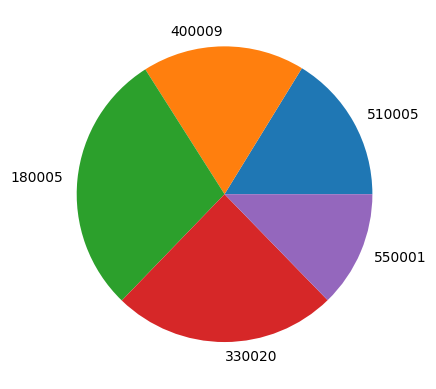

In [47]:
estaciones = []
radiacionAnual = []
for i in range(0,len(ids)):
    estaciones.append(bigDf.query('ID_Estacion == '+ids[i]))
    radiacionAnual.append(estaciones[i]["RadGInst (watt/m2)"].sum())
    print(radiacionAnual[i])
    
fig, ax = plt.subplots()
ax.pie(radiacionAnual, labels=ids)